In [1]:
import pandas as pd
import numpy as np

In [19]:
df=pd.read_csv('LR.csv')
df

,Age,Salary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [20]:
X=df.iloc[:,[0,1]]
y=df.iloc[:,2]
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [22]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.fit_transform(X_test)

In [23]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=10,random_state=0)
classifier.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [24]:
y_pred=classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0])

In [25]:
y_test

57     0
192    0
398    0
128    0
324    1
      ..
274    1
39     0
71     0
253    1
346    1
Name: Purchased, Length: 100, dtype: int64

array([[58,  7],
       [ 5, 30]])

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91        65
           1       0.81      0.86      0.83        35

    accuracy                           0.88       100
   macro avg       0.87      0.87      0.87       100
weighted avg       0.88      0.88      0.88       100



[0.         0.10769231 1.        ]
[0.         0.85714286 1.        ]
[2 1 0]


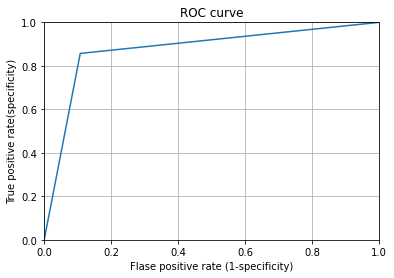

In [29]:
from matplotlib import pyplot as plt
from sklearn import metrics
fpr,tpr,thresholds=metrics.roc_curve(y_test,y_pred)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC curve')
plt.xlabel('Flase positive rate (1-specificity)')
plt.ylabel('True positive rate(specificity)')
plt.grid(True)
print(fpr)
print(tpr)
print(thresholds)

In [60]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred)

0.8747252747252747

In [61]:
from sklearn.metrics import confusion_matrix
con=confusion_matrix(y_test,y_pred)
TN=float(con[0,0])
FP=float(con[0,1])
FN=float(con[1,0])
TP=float(con[1,1])


In [62]:
print(metrics.precision_score(y_test,y_pred))
print(TP/(TP+FP))

0.8108108108108109
0.8108108108108109


In [45]:
print(metrics.accuracy_score(y_test,y_pred))

0.88
